# Actualización de Pesos

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import chapter1 as ut

Dada la operación AND, determinar el perceptrón genere un área de desición acorde a su tabla de verdad.

| $x_0$ | $x_1$ | $y$ |
|---------------------|
|   1   |   1   |  1  |
|   1   |   0   |  0  |
|   0   |   1   |  0  |
|   0   |   0   |  0  |

Visto de otra forma, la tabla de verdad se puede ver en una plano cartesiano como se muestra a continuación.

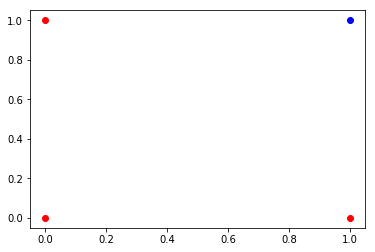

In [2]:
ut.plot_AND()

# Base de datos

In [3]:
# Definimos nuestras entradas
X = np.array([[1,1],
              [1,0],
              [0,1],
              [0,0]])


# Definimos los valores de salida que deseamos
Y = np.array([[1],
              [0],
              [0],
              [0]])

print('Valores de entrada:\n {}\n Etiquetas Verdaderas:\n {}'.format(X,Y))

Valores de entrada:
 [[1 1]
 [1 0]
 [0 1]
 [0 0]]
 Etiquetas Verdaderas:
 [[1]
 [0]
 [0]
 [0]]


# Inicialización de pesos

In [4]:
# Pesos
# Debería aproximarse a algo similar 0.2 and 0.2
W = np.array([[0.5],[0.1]])

# Bias
# Debería aproximarse a algo similar -0.2
b = np.array([[0]])

print('Pesos:\n {}\n Bias:\n {}\n'.format(W,b))

Pesos:
 [[0.5]
 [0.1]]
 Bias:
 [[0]]



# Primera predicción sin entrenamiento

Predicciones:
 [[1]
 [1]
 [1]
 [0]]


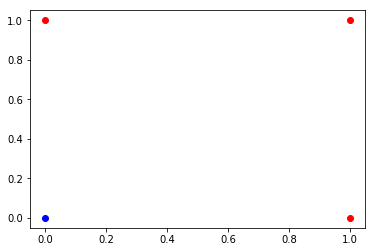

In [5]:
# Predecimos los valores de nuestra red
s = np.dot(X,W) + b
y_pred = ut.sigmoid(s)
y_pred = (y_pred>0.5).astype(np.int32)

print('Predicciones:\n {}'.format(y_pred))

ut.plot_pred_AND(X,y_pred)

# Area de desición de la red
Esta figura nos muestra como va cambiando el área de desición de nuestra red neuronal. El área pintada en azul corresponde a ceros, y el área en rojo corresponde a unos.

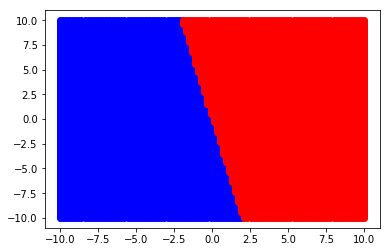

In [6]:
# Area de desición
ut.plot_area_AND(W,b)

# Definición de entrenamiento

In [7]:
def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return(y)

def dsigmoid(x):
    dsig = sigmoid(x)*(1 - sigmoid(x))
    return(dsig)

def train_AND(X,Y,W,b,lr=0.01,verbose=False):
    # W has Shape [2,1]
    # b has Shape [1,1]
    
    # Feed-Forward
    s_pre = np.dot(X,W)
    s = s_pre + b
    y_pred = sigmoid(s)
    
    # Loss
    losses = (Y-y_pred)**2
    loss = np.sum(losses)/Y.shape[0]
    
    # Back-Propagation
    dL = np.ones_like(y_pred) #(-2/Y.shape[0])*np.sum(Y-y_pred)
    dsigma = dsigmoid(y_pred) * dL
    
    db = np.sum(dsigma)/Y.shape[0]
    
    dW = np.dot(dsigma.T,X)/Y.shape[0]
    
    # Actualizacion de pesos
    new_W = W - lr*dW.T
    new_b = b - lr*db
    
    if verbose:
        print('Y:\n{}'.format(Y))
        print('\ny_pred:\n{}'.format(y_pred))
        print('\nLosses:\n{}'.format(losses))
        print('\nLoss:\n{}'.format(loss))
        print('\ndsigma:\n{}'.format(dsigma))
        print('\ndb:\n{}'.format(db))
        print('\ndW:\n{}'.format(dW))
    
    return(new_W,new_b)

# Iniciamos entrenamiento

In [8]:
for i in range(1):
    tmp_W,tmp_b = train_AND(X,Y,tmp_W,tmp_b,lr=0.01,verbose=False)

print('\ntmp_W:\n{}'.format(tmp_W))
print('\ntmp_b:\b{}'.format(tmp_b))

# Area de desición
ut.plot_area_AND(tmp_W,tmp_b)

NameError: name 'tmp_W' is not defined